<a href="https://colab.research.google.com/github/skj092/Sefty_Helmet_Detection/blob/main/Seftyhelmet_detection_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sefty Helmet Detection using YOLO

## Cloning the yolov5 repository

In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12727, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 12727 (delta 45), reused 47 (delta 21), pack-reused 12633
Receiving objects: 100% (12727/12727), 12.95 MiB | 34.72 MiB/s, done.
Resolving deltas: 100% (8759/8759), done.


## Settin up Directory structure for the YOLO

## Downloading dataset using kaggle api

In [2]:
from google.colab import files
file = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir ../../root/.kaggle/

In [4]:
!cp kaggle.json ../../root/.kaggle

In [5]:
cd data/input

[Errno 2] No such file or directory: 'data/input'
/content


In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d sonujha090/hardhat

 99% 1.15G/1.16G [00:07<00:00, 182MB/s]
100% 1.16G/1.16G [00:07<00:00, 162MB/s]


In [11]:
import os 

if not os.path.exists("HardHat_Dataset"):
  os.mkdir("HardHat_Dataset")

In [ ]:
!unzip hardhat.zip -d "HardHat_Dataset"

# Dividing the data into training and testing sets

In [13]:


# Importing the libraries
import os 
from glob import glob
import random 
import cv2 
import shutil
from pathlib import Path
from tqdm import tqdm

p = Path('.')
data_dir = Path('HardHat_Dataset')
img_dir = data_dir/'images/'
annot_dir = data_dir/'annotations'

# Creating a list of all the images
all_images = list(p.glob(f'{img_dir}/*.png'))

# shuffling the data
random.shuffle(all_images)
# Splitting the data into training and testing sets
train_images = all_images[:int(0.8*len(all_images))]
test_images = all_images[int(0.8*len(all_images)):]
print('langth of train and test set are:', len(train_images), len(test_images))

# Splitting the data into training and testing folder 
if not os.path.exists(path=data_dir/'train'):
    os.mkdir(data_dir/'train')
    os.mkdir(path=data_dir/'train'/'images')
    os.mkdir(path=data_dir/'train'/'labels')

if not os.path.exists(path=data_dir/'test'):
    os.mkdir(data_dir/'test')
    os.mkdir(path=data_dir/'test'/'images')
    os.mkdir(path=data_dir/'test'/'labels')


# Copying the images and annotations into the train and test folder
for source in tqdm(all_images):
    destination_img = os.path.join('HardHat_Dataset/train/images', os.path.basename(source))
    destination_annot = os.path.join('HardHat_Dataset/train/labels/', source.name.replace('.png', '.xml'))
    shutil.copy(source, destination_img)
    source_annot = os.path.join('HardHat_Dataset/annotations/', source.name.replace('.png', '.xml'))
    shutil.copy(source_annot, destination_annot)

for source in tqdm(test_images):
    destination_img = os.path.join('HardHat_Dataset/test/images', os.path.basename(source))
    destination_annot = os.path.join('HardHat_Dataset/test/labels/', source.name.replace('.png', '.xml'))
    shutil.copy(source, destination_img)
    source_annot = os.path.join('HardHat_Dataset/annotations/', source.name.replace('.png', '.xml'))
    shutil.copy(source_annot, destination_annot)


langth of train and test set are: 3800 950


100%|██████████| 950/950 [00:01<00:00, 944.02it/s]


In [ ]:
# removing train and test folder 
# shutil.rmtree(path=data_dir/'train')
# shutil.rmtree(path=data_dir/'test')

## Preparing training setup

In [14]:
cd yolov5

/content/yolov5


In [15]:
!touch helmet.yaml

In [ ]:
# train: /content/HardHat_Dataset/train/
# val: /content/HardHat_Dataset/test
# nc: 2
# names: ["head", "helmet"]

In [18]:
!python train.py --img 400 --batch 16  --epochs 50 --data helmet.yaml 

train: weights=yolov5s.pt, cfg=, data=helmet.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=400, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-162-g55fbac9 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

## After restart runtime

In [ ]:
cd Global-Wheat-Detection-YOLO/

/content/Global-Wheat-Detection-YOLO


In [ ]:
cd yolov5

/content/Global-Wheat-Detection-YOLO/yolov5


In [ ]:
!python train.py --img 1024 --batch 16  --epochs 20 --data wheat.yaml 

train: weights=yolov5s.pt, cfg=, data=wheat.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=1024, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-253-g75bbaa8 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=

# Prediction

In [ ]:
!cp /content/Global-Wheat-Detection-YOLO/yolov5/runs/train/exp2/weights/best.pt .

In [ ]:
!python detect.py --source /content/Global-Wheat-Detection-YOLO/data/input/test --weights best.pt

detect: weights=['best.pt'], source=/content/Global-Wheat-Detection-YOLO/data/input/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-253-g75bbaa8 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients
image 1/10 /content/Global-Wheat-Detection-YOLO/data/input/test/2fd875eaa.jpg: 640x640 30 wheats, Done. (0.013s)
image 2/10 /content/Global-Wheat-Detection-YOLO/data/input/test/348a992bb.jpg: 640x640 39 wheats, Done. (0.013s)
image 3/10 /content/Global-Wheat-Detection-YOLO/data/input/test/51b3e36ab.jpg: 640x640 26 wheats, Done. (0.013s)
image 4/10 /content/Glob

## Results

In [ ]:
from IPython.display import Image

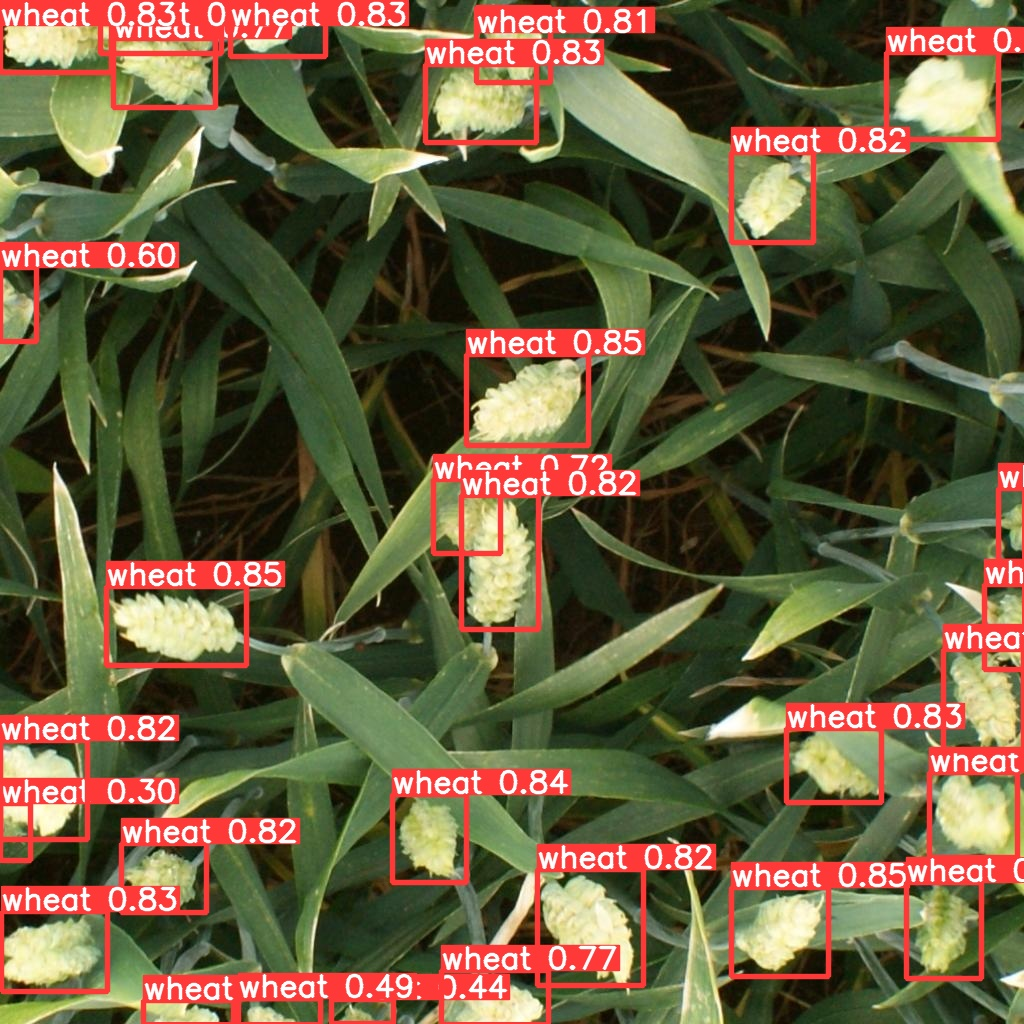

In [ ]:
Image(filename='/content/Global-Wheat-Detection-YOLO/yolov5/runs/detect/exp/2fd875eaa.jpg') 

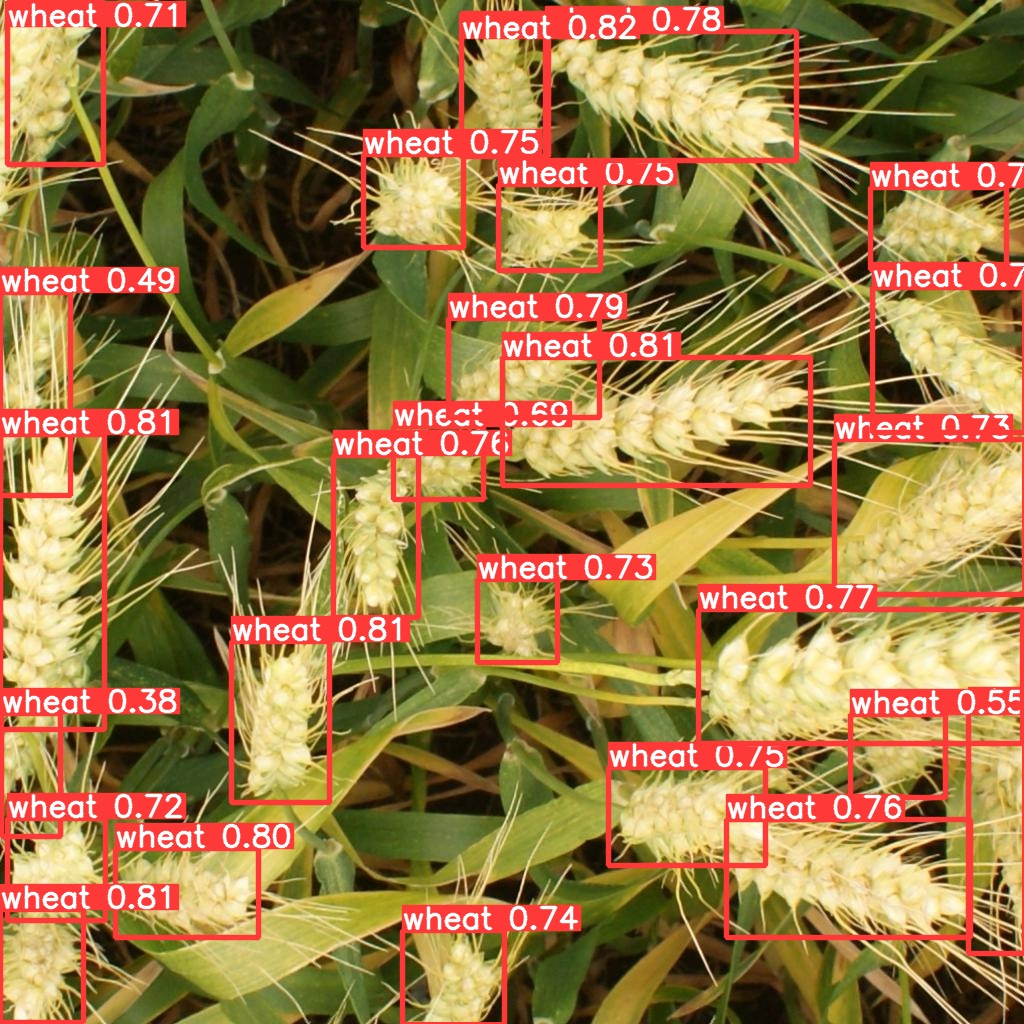

In [ ]:
Image(filename='/content/Global-Wheat-Detection-YOLO/yolov5/runs/detect/exp/51b3e36ab.jpg') 